# Final assignment: Gekoppelde tanks met zoutoplossingen

## differentiaalvergelijkingen
Hier onder zijn de differentiaalvergelijkingen gegeven voor de hoeveelheid zout tank $X$ & $Y$
- $\dot{X} = 1.2 \cdot Y_t \cdot \frac{1}{100} - X_t \cdot \frac{7}{100}$
- $\dot{Y} = X_t \cdot \frac{3}{100} - Y_t \cdot \frac{3}{100}$
<br>

We berekenen de hoeveelheid zout per tank in kg, dit is simpel om te rekenen naar de concentratie. Om bij deze formules te komen heb ik gekeken naar de instroom en uitstroom van beide tanks en op basis daarvan de formule opgesteld.

## Code
### Imports

In [206]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

### Constanten

In [215]:
end_time = 250.0  # minutes

inhoud_tankx = 100
inhoud_tanky = 100

# Nog meer variabel maken?

### Forward Euler

In [216]:
def tanks_fe(h=1):
    num_steps = int(end_time / h)
    times = h * np.array(range(num_steps + 1))
    
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    
    y[0] = 20
    for step in range(num_steps):
        x[step + 1] = x[step] + h * (1.2 + y[step] * 1/100 - x[step] * 7/100)
        y[step + 1] = y[step] + h * (x[step] * 3/100 - y[step] * 3/100)
    # We delen door de inhoud van de tanks omdat de concentratie wordt gevraagd in kg / L
    x = x / inhoud_tankx
    y = y / inhoud_tanky
    return x, y, times

### Heun

In [301]:
def tanks_h(h = 1):
    num_steps = int(end_time / h)
    times = h * np.array(range(num_steps + 1))
    
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)

    y[0] = 20
    for step in range(num_steps):
        x_e = 1.2 + y[step] * 1/100 - x[step] * 7/100
        y_e = x[step] * 3/100 - y[step] * 3/100
        
        x_pe = 1.2 + y[step - 1] * 1/100 - x[step-1] * 7/100
        y_pe = x[step - 1] * 3/100 - y[step - 1] * 3/100
        
        x[step + 1] = x[step] + h * 0.5 * (x_pe + x_e)
        y[step + 1] = y[step] + h * 0.5 * (y_pe + y_e)
    # We delen door de inhoud van de tanks omdat de concentratie wordt gevraagd in kg / L
    x = x / inhoud_tankx
    y = y / inhoud_tanky
    return x, y, times

### Plot functie voor twee losse plots

In [302]:
def two_plots(px, py, t):
    axes_x = plt.subplot(211)
    plt.plot(t, px)
    axes_y = plt.subplot(212)
    plt.plot(t, py)
    axes_x.set_ylabel('Salt in kg / L. Tank x', fontsize=10)
    axes_y.set_ylabel('Salt in kg / L. Tank y', fontsize=10)
    axes_y.set_xlabel('Time in minutes', fontsize=10)
    plt.show()

### Plot functie voor één plot

In [303]:
def one_plot(px, py, t):
    x_plot = plt.plot(t, px, label='Tank x')
    y_plot = plt.plot(t, py, label='Tank y')
    plt.legend(('Tank x', 'Tank y'), loc='upper right')

    axes = plt.gca()
    axes.set_xlabel('Time in minutes', fontsize=12)
    axes.set_ylabel('Salt in kg / L', fontsize=12)
    plt.show()

### Plot forward Euler

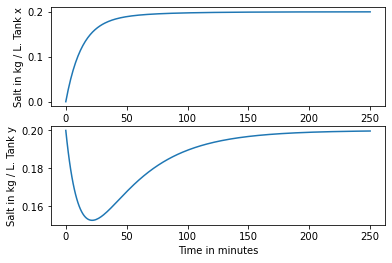

In [304]:
x, y, t = tanks_fe()
two_plots(x, y, t)

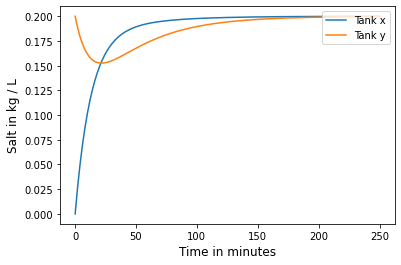

In [305]:
one_plot(x, y, t)

### Interactive forward Euler
Je kunt de "h" slider gebruiken om de step size aan te passen.

In [306]:
def update_x(h):
    plt.figure(2)
    x, y, t = tanks_fe(h)
    plt.xlabel('Time in minutes', fontsize=18)
    plt.ylabel('Salt in kg / L', fontsize=18)
    plt.plot(t, x)
    plt.show()

interactive_plot = interactive(update_x, h=(0.01, 20.0, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='h', max=20.0, min=0.01, step=0.01), Output(layout=L…

In [307]:
def update_y(h):
    plt.figure(2)
    x, y, t = tanks_fe(h)
    plt.xlabel('Time in minutes', fontsize=18)
    plt.ylabel('Salt in kg / L', fontsize=18)
    plt.plot(t, y)
    plt.show()

interactive_plot = interactive(update_y, h=(0.01, 20.0, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='h', max=20.0, min=0.01, step=0.01), Output(layout=L…

### Plot Heun

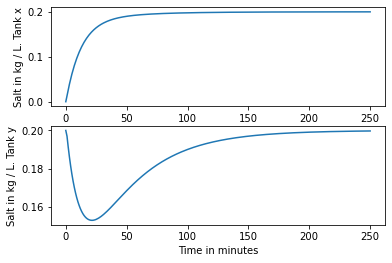

In [308]:
x, y, t = tanks_h()
two_plots(x, y, t)

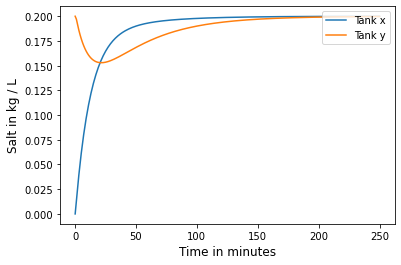

In [309]:
one_plot(x, y, t)

### Interactive Heun's
Je kunt de "h" slider gebruiken om de step size aan te passen.

In [310]:
def update_x(h):
    plt.figure(2)
    x, y, t = tanks_h(h)
    plt.xlabel('Time in minutes', fontsize=18)
    plt.ylabel('Salt in kg / L', fontsize=18)
    plt.plot(t, x)
    plt.show()

interactive_plot = interactive(update_x, h=(0.01, 20.0, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='h', max=20.0, min=0.01, step=0.01), Output(layout=L…

In [311]:
def update_y(h):
    plt.figure(2)
    x, y, t = tanks_h(h)
    plt.xlabel('Time in minutes', fontsize=18)
    plt.ylabel('Salt in kg / L', fontsize=18)
    plt.plot(t, y)
    plt.show()

interactive_plot = interactive(update_y, h=(0.01, 20.0, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='h', max=20.0, min=0.01, step=0.01), Output(layout=L…